# Prerequisites

## Install Library

In [1]:
# for python 3.11.4
%pip install flaml
%pip install -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import Library

In [2]:
## Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from flaml import AutoML
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay, average_precision_score, cohen_kappa_score
from sklearn.model_selection import train_test_split
import json
import os
import joblib
import warnings
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-23 23:08:00,055	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-07-23 23:08:00,526	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


## Read Data

In [3]:
df = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTrain_cleaned.csv", index_col=0)
# df = pd.read_csv("D:/NIDA/9000_IS/dataset/fraudTrain_cleaned.csv", index_col=0)

In [4]:
# Convert trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [5]:
df.head()

,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,514,4.97,Jennifer,Banks,0,561 Perry Cove,526,27,...,0,0,0,1,0,0,0,0,0,78.773821
1,2019-01-01 00:00:44,630423337322,241,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,612,47,...,0,0,0,0,0,0,0,0,0,30.216618
2,2019-01-01 00:00:51,38859492057661,390,220.11,Edward,Sanchez,1,594 White Dale Suite 530,468,13,...,0,0,0,0,0,0,0,0,0,108.102912
3,2019-01-01 00:01:16,3534093764340240,360,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,84,26,...,0,0,0,0,0,0,0,0,0,95.685115
4,2019-01-01 00:03:06,375534208663984,297,41.96,Tyler,Garcia,1,408 Bradley Rest,216,45,...,0,0,0,0,1,0,0,0,0,77.702395


In [6]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age', 'hour', 'day', 'month', 'year', 'is_weekend',
       'is_weekday', 'time_diff', 'diff_days', 'diff_hours', 'diff_minutes',
       'diff_seconds', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'distance'],
      dtype='object')

In [7]:
df.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                            int64
amt                               float64
first                              object
last                               object
gender                              int64
street                             object
city                                int64
state                               int64
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                 int64
dob                                object
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
age                                 int64
hour                                int64
day                               

In [8]:
df.isnull().sum()

trans_date_trans_time      0
cc_num                     0
merchant                   0
amt                        0
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
age                        0
hour                       0
day                        0
month                      0
year                       0
is_weekend                 0
is_weekday                 0
time_diff                  0
diff_days                  0
diff_hours                 0
diff_minutes               0
diff_seconds               0
category_entertainment     0
category_food_

In [9]:
df_all = df.copy()

# Standard 70/20/10 train/validation/test split
# First split: 70% train, 30% temp (ซึ่งจะถูกแบ่งเป็น 20% val, 10% test)
X_temp = df_all.drop(['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num', 'is_fraud'], axis=1)
y_temp = df_all['is_fraud']

X_train, X_temp, y_train, y_temp = train_test_split(
    X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp
)

# Second split: 20% validation, 10% test (จาก 30% temp)
# 20/30 = 0.667 สำหรับ validation, 10/30 = 0.333 สำหรับ test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.333, random_state=42, stratify=y_temp
)

# สร้าง DataFrame สำหรับแต่ละชุดข้อมูล
train_indices = X_train.index
val_indices = X_val.index
test_indices = X_test.index

df_train_final = df_all.loc[train_indices]
df_val = df_all.loc[val_indices]
df_test = df_all.loc[test_indices]

# Feature engineering function for FLAML
def prepare_features_for_flaml(df):
    df_processed = df.copy()

    # Handle datetime features
    if 'trans_date_trans_time' in df_processed.columns:
        # Ensure the column is datetime type
        df_processed['trans_date_trans_time'] = pd.to_datetime(df_processed['trans_date_trans_time'], errors='coerce')

        # Check if conversion was successful
        if df_processed['trans_date_trans_time'].dtype == 'datetime64[ns]':
            df_processed['hour'] = df_processed['trans_date_trans_time'].dt.hour
            df_processed['day_of_week'] = df_processed['trans_date_trans_time'].dt.dayofweek
            df_processed['month'] = df_processed['trans_date_trans_time'].dt.month
            df_processed['day'] = df_processed['trans_date_trans_time'].dt.day
        else:
            # If datetime conversion failed, create default values
            print("Warning: datetime conversion failed, using default time features")
            df_processed['hour'] = 12  # Default to noon
            df_processed['day_of_week'] = 0  # Default to Monday
            df_processed['month'] = 1  # Default to January
            df_processed['day'] = 1  # Default to 1st

        df_processed = df_processed.drop(['trans_date_trans_time'], axis=1)

    return df_processed

def safe_label_encode(series, encoder=None, is_training=True):
    """Safely encode categorical data, handling unseen categories"""
    if is_training:
        # Fit encoder on training data
        encoder = LabelEncoder()
        encoded = encoder.fit_transform(series.astype(str))
        return encoded, encoder
    else:
        # Transform with existing encoder, handle unseen categories
        series_str = series.astype(str)
        # Find unseen categories
        unseen_mask = ~series_str.isin(encoder.classes_)

        if unseen_mask.any():
            print(f"Warning: Found {unseen_mask.sum()} unseen categories, assigning to class 0")
            # Create a copy and replace unseen categories with the first class
            series_str = series_str.copy()
            series_str[unseen_mask] = encoder.classes_[0]

        encoded = encoder.transform(series_str)
        return encoded, encoder

# First, prepare features for all datasets
df_train_processed = prepare_features_for_flaml(df_train_final)
df_val_processed = prepare_features_for_flaml(df_val)
df_test_processed = prepare_features_for_flaml(df_test)

# Handle categorical variables with safe encoding
categorical_columns = df_train_processed.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != 'is_fraud']

le_dict = {}

# Fit encoders on training data and transform all sets
for col in categorical_columns:
    if col in df_train_processed.columns:
        # Fit on training data
        df_train_processed[col], le_dict[col] = safe_label_encode(
            df_train_processed[col], is_training=True
        )

        # Transform validation data
        if col in df_val_processed.columns:
            df_val_processed[col], _ = safe_label_encode(
                df_val_processed[col], encoder=le_dict[col], is_training=False
            )

        # Transform test data
        if col in df_test_processed.columns:
            df_test_processed[col], _ = safe_label_encode(
                df_test_processed[col], encoder=le_dict[col], is_training=False
            )

X_train = df_train_processed.drop(['is_fraud'], axis=1)
y_train = df_train_processed['is_fraud']
X_val = df_val_processed.drop(['is_fraud'], axis=1)
y_val = df_val_processed['is_fraud']
X_test = df_test_processed.drop(['is_fraud'], axis=1)
y_test = df_test_processed['is_fraud']

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Features: {list(X_train.columns)}")

Training set shape: (907672, 47)
Validation set shape: (259465, 47)
Test set shape: (129538, 47)
Features: ['cc_num', 'merchant', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month', 'year', 'is_weekend', 'is_weekday', 'time_diff', 'diff_days', 'diff_hours', 'diff_minutes', 'diff_seconds', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'distance', 'day_of_week']


In [10]:
df_train_final.shape, df_val.shape, df_test.shape

((907672, 48), (259465, 48), (129538, 48))

# Model Pipeline

## FLAML AutoML

### Model Training

In [11]:
# Initialize FLAML AutoML
automl = AutoML()

# Configure settings for fraud detection with reduced time budget to prevent timeout
settings = {
    "time_budget": 120,  # Reduced to 2 minutes to prevent timeout
    "metric": "ap",  # average precision for imbalanced classification
    "task": "classification",
    "log_file_name": "flaml_fraud_detection.log",
    "seed": 42,
    "verbose": 1,
    "early_stop": True,

    # Efficient training strategies
    "eval_method": "holdout",  # Must use holdout when providing custom validation data
    "log_training_metric": True,

    # Model selection focused on fast algorithms
    "ensemble": False,  # Disable ensemble to speed up training
    "auto_augment": False,  # Disable auto data augmentation
    "max_iter": 100,  # Reduce iterations to prevent timeout

    # Focus on fast, effective estimators for fraud detection
    "estimator_list": [
        "lgbm",      # LightGBM - fast and effective
        "rf",        # Random Forest - good for fraud detection
        "lrl1",      # Logistic Regression L1 - fast baseline
        "xgboost",   # XGBoost - effective for classification
        "catboost",  # CatBoost - handles categorical features well
        "extra_tree", # Extra Trees - fast and robust
    ],

    # Additional efficiency settings
    "retrain_full": False,  # Don't retrain on full dataset
    "mem_thres": 4 * (1024**3),  # 4GB memory threshold
}

print("Starting FLAML training with reduced time budget...")
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# Fit the model with validation data for early stopping
automl.fit(X_train, y_train, X_val=X_val, y_val=y_val, **settings)

print("FLAML training completed successfully!")

Starting FLAML training with reduced time budget...
Training data shape: (907672, 47)
Validation data shape: (259465, 47)
FLAML training completed successfully!


In [12]:
# Add regularization monitoring
print("=== Model Training Summary ===")
print(f"Best ML learner: {automl.best_estimator}")
print(f"Best hyperparameter config: {automl.best_config}")
print(f"Best validation score: {-automl.best_loss:.4f}")  # Negative because FLAML minimizes loss
print(f"Training duration: {automl.best_config_train_time:.2f}s")

# Check if ensemble was used
if hasattr(automl, '_trained_estimator') and hasattr(automl._trained_estimator, 'estimators_'):
    print(f"Ensemble size: {len(automl._trained_estimator.estimators_)}")
else:
    print("Single model (no ensemble)")

=== Model Training Summary ===
Best ML learner: xgboost
Best hyperparameter config: {'n_estimators': 104, 'max_leaves': 69, 'min_child_weight': 0.1011531764053484, 'learning_rate': 0.11674511153369367, 'subsample': 0.8338366892463769, 'colsample_bylevel': 0.9925605286749656, 'colsample_bytree': 1.0, 'reg_alpha': 0.002504166932379495, 'reg_lambda': 0.7600713971648585}
Best validation score: -0.1123
Training duration: 5.73s
Single model (no ensemble)


### Evaluate and Compare The Results

In [13]:
# Predict on validation set
y_val_pred = automl.predict(X_val)
y_val_proba = automl.predict_proba(X_val)[:, 1]

print("=== Validation Performance ===")
print(classification_report(y_val, y_val_pred, digits=4))
print(f"ROC-AUC: {roc_auc_score(y_val, y_val_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_val, y_val_proba):.4f}")

# Training performance for overfitting check
y_train_pred = automl.predict(X_train)
y_train_proba = automl.predict_proba(X_train)[:, 1]

print("\n=== Training Performance ===")
print(f"Training ROC-AUC: {roc_auc_score(y_train, y_train_proba):.4f}")
print(f"Training Average Precision: {average_precision_score(y_train, y_train_proba):.4f}")

# Overfitting indicator
train_ap = average_precision_score(y_train, y_train_proba)
val_ap = average_precision_score(y_val, y_val_proba)
overfitting_gap = train_ap - val_ap

print(f"\n=== Overfitting Check ===")
print(f"Training-Validation AP Gap: {overfitting_gap:.4f}")
if overfitting_gap > 0.05:
    print("⚠️  Potential overfitting detected (gap > 0.05)")
elif overfitting_gap > 0.02:
    print("⚡ Minor overfitting (gap > 0.02)")
else:
    print("✅ Good generalization (gap <= 0.02)")

=== Validation Performance ===
              precision    recall  f1-score   support

           0     0.9982    0.9999    0.9990    257963
           1     0.9743    0.6818    0.8022      1502

    accuracy                         0.9981    259465
   macro avg     0.9862    0.8408    0.9006    259465
weighted avg     0.9980    0.9981    0.9979    259465

ROC-AUC: 0.9959
Average Precision: 0.8877

=== Training Performance ===
Training ROC-AUC: 0.9960
Training Average Precision: 0.9125

=== Overfitting Check ===
Training-Validation AP Gap: 0.0248
⚡ Minor overfitting (gap > 0.02)


In [14]:
# --- Predict on test set ---
y_true = y_test.values
y_pred = automl.predict(X_test)
y_proba = automl.predict_proba(X_test)[:, 1]  # probability for class 1 (fraud)

Classification Report

In [15]:
# Evaluate on test set
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9982    0.9999    0.9990    128788
           1     0.9662    0.6853    0.8019       750

    accuracy                         0.9980    129538
   macro avg     0.9822    0.8426    0.9004    129538
weighted avg     0.9980    0.9980    0.9979    129538



Confusion Matrix

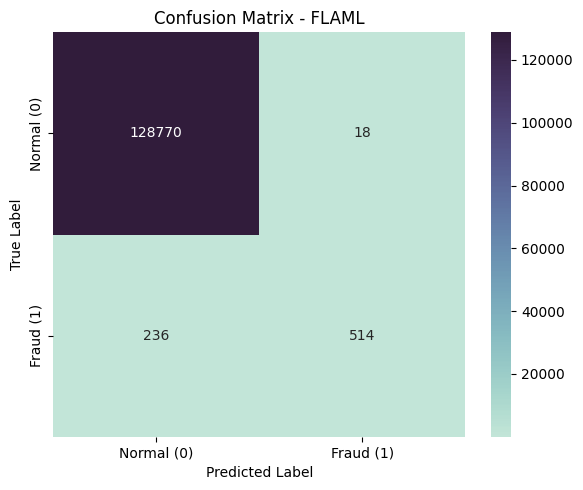

In [16]:
cm = confusion_matrix(y_true, y_pred)
labels = ['Normal (0)', 'Fraud (1)']
plt.figure(figsize=(6, 5))
cubehelix_cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.heatmap(cm, annot=True, fmt='d', cmap=cubehelix_cmap, xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - FLAML')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [17]:
metrics = {
    "Method": ["FLAML"],
    "Precision": [
        precision_score(y_true, y_pred)
    ],
    "Recall": [
        recall_score(y_true, y_pred)
    ],
    "F1-Score": [
        f1_score(y_true, y_pred)
    ],
    "ROC-AUC": [
        roc_auc_score(y_true, y_proba)
    ],
    "Cohen Kappa": [
        cohen_kappa_score(y_true, y_pred)
    ]
}

df_metrics = pd.DataFrame(metrics)
display(df_metrics)

,Method,Precision,Recall,F1-Score,ROC-AUC,Cohen Kappa
0,FLAML,0.966165,0.685333,0.801872,0.99552,0.800915


ROC Curve

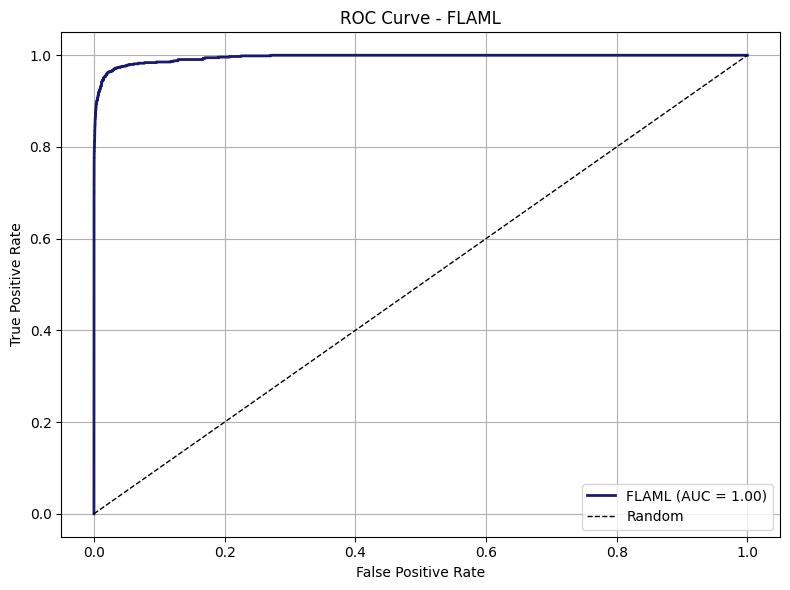

In [18]:
# --- Display ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='midnightblue', lw=2, label=f'FLAML (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - FLAML')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Precision-Recall Curve

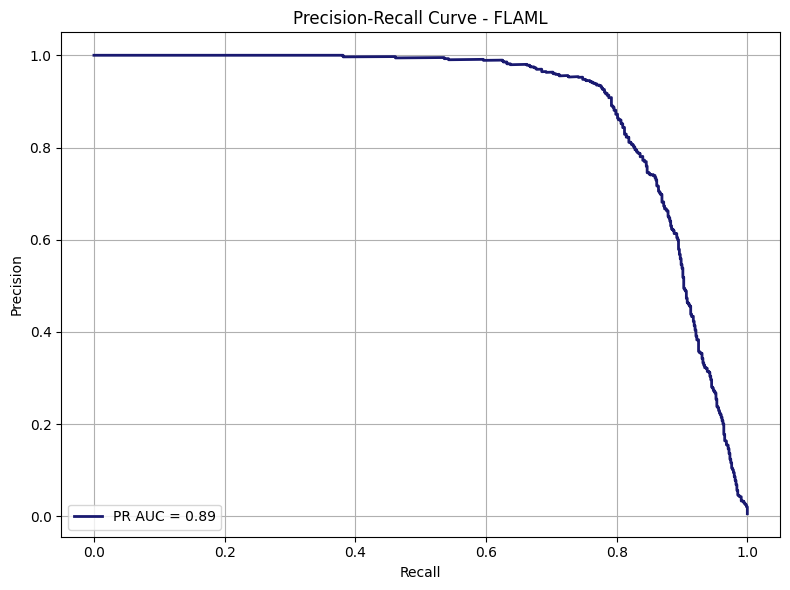

In [19]:
# --- Display Precision-Recall Curve ---
precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
pr_auc = average_precision_score(y_true, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='midnightblue', lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - FLAML')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

Metrics Comparison

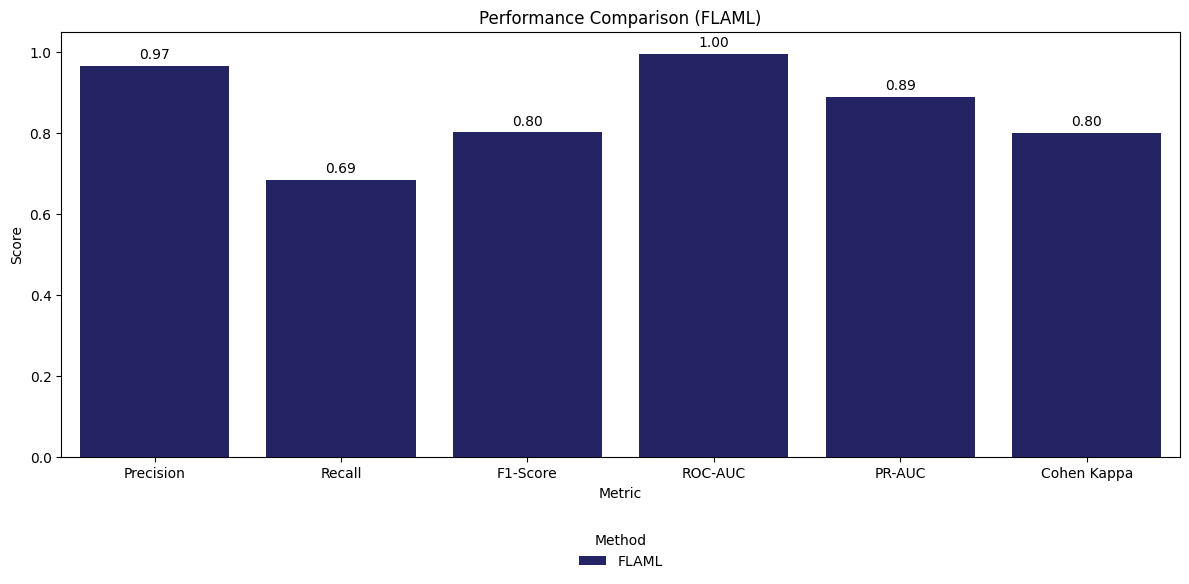

In [20]:
# --- Display Metrics Comparison ---
metrics = {
    "Method": ["FLAML"],
    "Precision": [precision_score(y_true, y_pred)],
    "Recall": [recall_score(y_true, y_pred)],
    "F1-Score": [f1_score(y_true, y_pred)],
    "ROC-AUC": [roc_auc],
    "PR-AUC": [pr_auc],
    "Cohen Kappa": [cohen_kappa_score(y_true, y_pred)]
}
df_metrics = pd.DataFrame(metrics)
df_melt = df_metrics.melt(id_vars="Method", var_name="Metric", value_name="Score")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melt, x="Metric", y="Score", hue="Method", palette=["midnightblue"])
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha="center", va="bottom"
        )
plt.title("Performance Comparison (FLAML)")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(
    title="Method",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False
)
plt.tight_layout()
plt.grid(False)
plt.show()

Overfitting Plot

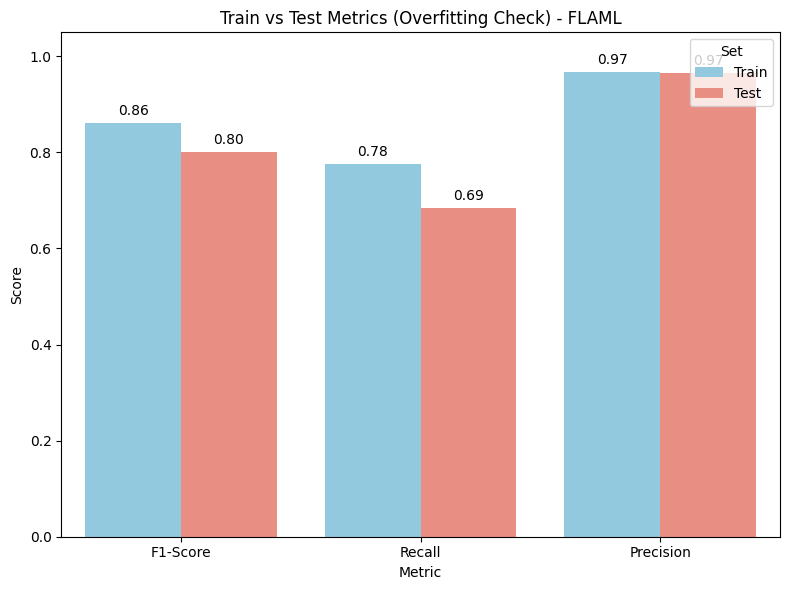

In [21]:
# --- Train set ---
y_train_pred = automl.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)

# --- Test set ---
test_f1 = f1_score(y_true, y_pred)
test_recall = recall_score(y_true, y_pred)
test_precision = precision_score(y_true, y_pred)

df_overfit = pd.DataFrame({
    "Metric": ["F1-Score", "Recall", "Precision"],
    "Train": [train_f1, train_recall, train_precision],
    "Test": [test_f1, test_recall, test_precision]
})
df_overfit = df_overfit.melt(id_vars="Metric", var_name="Set", value_name="Score")
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_overfit, x="Metric", y="Score", hue="Set", palette=["skyblue", "salmon"])
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha="center", va="bottom"
        )
plt.title("Train vs Test Metrics (Overfitting Check) - FLAML")
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.tight_layout()
plt.grid(False)
plt.legend(title='Set', loc="upper right")
plt.show()

### 2.3 Save Model

In [22]:
# Save FLAML model and preprocessing components
model_dir = "/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/general_split/flaml_model"
# model_dir = "D:/NIDA/9000_IS/git_repo/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/flaml_model"
os.makedirs(model_dir, exist_ok=True)

# Save the model
joblib.dump(automl, os.path.join(model_dir, "flaml_fraud_model.joblib"))

# Save label encoders for consistent preprocessing
with open(os.path.join(model_dir, "label_encoders.joblib"), "wb") as f:
    joblib.dump(le_dict, f)

# Save feature names for validation
with open(os.path.join(model_dir, "feature_names.joblib"), "wb") as f:
    joblib.dump(list(X_train.columns), f)

print("FLAML model and preprocessing components saved successfully!")
print(f"Model validation AP: {val_ap:.4f}")
print(f"Overfitting gap: {overfitting_gap:.4f}")

FLAML model and preprocessing components saved successfully!
Model validation AP: 0.8877
Overfitting gap: 0.0248


# Model Testing

In [23]:
df_test_raw = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTest_cleaned.csv", index_col=0)
# df_test_raw = pd.read_csv("D:/NIDA/9000_IS/dataset/fraudTest_cleaned.csv", index_col=0)

# Load FLAML model and preprocessing components
model_dir = "/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/general_split/flaml_model"
# model_dir = "D:/NIDA/9000_IS/git_repo/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/flaml_model"

try:
    automl_loaded = joblib.load(os.path.join(model_dir, "flaml_fraud_model.joblib"))

    with open(os.path.join(model_dir, "label_encoders.joblib"), "rb") as f:
        le_dict_loaded = joblib.load(f)

    with open(os.path.join(model_dir, "feature_names.joblib"), "rb") as f:
        expected_features = joblib.load(f)

    print("Model loaded successfully!")
    model_loaded = True

except FileNotFoundError:
    print("Using model from current session")
    automl_loaded = automl
    le_dict_loaded = le_dict
    expected_features = list(X_train.columns)
    model_loaded = True

except Exception as e:
    print(f"Error loading model: {e}")
    model_loaded = False

Model loaded successfully!


In [24]:
# Random sample for testing
sample_df = df_test_raw.sample(100).copy()
print(f"Sample data shape: {sample_df.shape}")

Sample data shape: (100, 48)


In [25]:
# Streamlined preprocessing function
def preprocess_sample_data(sample_df, le_dict, expected_features):
    """Preprocess sample data for prediction"""
    try:
        # Apply feature engineering
        sample_df_processed = prepare_features_for_flaml(sample_df)

        # Apply label encoding with error handling
        for col, le in le_dict.items():
            if col in sample_df_processed.columns:
                sample_df_processed[col], _ = safe_label_encode(
                    sample_df_processed[col], encoder=le, is_training=False
                )

        # Prepare features
        X_sample = sample_df_processed.drop(['is_fraud'], axis=1, errors='ignore')

        # Add missing features
        for feature in expected_features:
            if feature not in X_sample.columns:
                X_sample[feature] = 0

        # Reorder columns to match training
        X_sample = X_sample[expected_features]

        return X_sample

    except Exception as e:
        print(f"Preprocessing error: {e}")
        return None

if model_loaded:
    # Prepare features for prediction
    X_sample = preprocess_sample_data(sample_df, le_dict_loaded, expected_features)

    if X_sample is not None:
        try:
            # Make predictions
            predictions = automl_loaded.predict(X_sample)
            probabilities = automl_loaded.predict_proba(X_sample)

            # Add results to dataframe
            sample_df['predicted_result'] = predictions.astype(int)
            sample_df['fraud_probability'] = probabilities[:, 1]

            print("Prediction completed successfully!")
            print(f"Fraud cases detected: {sum(sample_df['predicted_result'])}")
            print(f"Average fraud probability: {sample_df['fraud_probability'].mean():.4f}")

        except Exception as e:
            print(f"Prediction error: {e}")
            sample_df['predicted_result'] = 0
            sample_df['fraud_probability'] = 0.0
    else:
        print("Could not preprocess sample data")
        sample_df['predicted_result'] = 0
        sample_df['fraud_probability'] = 0.0
else:
    print("Model not loaded")
    sample_df['predicted_result'] = 0
    sample_df['fraud_probability'] = 0.0

Prediction completed successfully!
Fraud cases detected: 0
Average fraud probability: 0.0001


In [26]:
# Display results
columns_to_show = [
    'trans_date_trans_time', 'trans_num', 'cc_num', 'first', 'last', 'merchant', 'amt',
    'is_fraud', 'predicted_result', 'fraud_probability'
]

available_columns = [col for col in columns_to_show if col in sample_df.columns]
print(f"Available columns: {available_columns}")

if len(available_columns) > 0:
    display(sample_df[available_columns].reset_index(drop=True))
else:
    display(sample_df.head())

Available columns: ['trans_date_trans_time', 'trans_num', 'cc_num', 'first', 'last', 'merchant', 'amt', 'is_fraud', 'predicted_result', 'fraud_probability']


,trans_date_trans_time,trans_num,cc_num,first,last,merchant,amt,is_fraud,predicted_result,fraud_probability
0,2020-09-23 00:47:19,b458a706e47dcc574753590bb8878550,2348245054386329,Justin,Gay,444,93.24,0,0,0.000053
1,2020-09-11 22:38:45,838bb2f87bfaddba3230d7323f538743,3521815216091574,Wayne,Marsh,538,98.93,0,0,0.000052
2,2020-09-29 18:37:58,8fe5bde746a63e459aaf6bfd9458abb5,213102873001603,Joanne,Padilla,40,61.45,0,0,0.000036
3,2020-09-28 17:35:55,13701f805f011a7393dc8f7829b8c716,342952484382519,Kayla,Jones,555,7.43,0,0,0.000018
4,2020-12-02 06:24:26,0c01936de86222377adf2dea3a552f61,4561892980175,Jacqueline,Allen,666,5.92,0,0,0.000030
...,...,...,...,...,...,...,...,...,...,...
95,2020-06-24 07:56:27,63350d1f78b91801f31312e54106ac45,3552581383553463,Jonathan,Castro,127,314.41,0,0,0.000061
96,2020-11-07 00:57:08,ed5221665c6f4cb7fa354292f96a0cdc,30551643947183,Morgan,Smith,92,78.63,0,0,0.000035
97,2020-07-05 03:01:02,d6c44355970a84052f5e79d28686c93f,3547560454237873,Jerry,Robinson,549,53.25,0,0,0.000028
98,2020-11-22 01:57:54,8dbbb649f04aea8ab4cb2c8ffb07684a,213157767990030,Tara,Campbell,664,55.20,0,0,0.000111
